In [41]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df_train_X = pd.read_csv(r'trainData/train_set.csv')
df_train_y = pd.read_csv(r'trainData/train_target_set.csv')

In [3]:
df_train_X

,Unnamed: 0,Sequence0,Sequence1,Sequence2,Sequence3,Sequence4,Sequence5,Sequence6,Sequence7,Sequence8,...,Sequence230,Sequence231,Sequence232,Sequence233,Sequence234,Sequence235,Sequence236,Sequence237,Sequence238,Sequence239
0,2017-01-03,-0.190584,0.080273,-0.221363,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,...,1.317595,-0.516843,-0.492220,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609
1,2017-01-04,0.080273,-0.221363,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,...,-0.516843,-0.492220,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766
2,2017-01-05,-0.221363,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,...,-0.492220,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766,-0.030532
3,2017-01-06,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,0.055649,...,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766,-0.030532,0.098740
4,2017-01-09,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,0.055649,-0.079779,...,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766,-0.030532,0.098740,-0.018221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323725,2019-08-02,0.274845,-2.084752,4.630552,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,...,-0.008553,0.133146,0.342615,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467
323726,2019-08-05,-2.084752,4.630552,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,...,0.133146,0.342615,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467,-0.070161
323727,2019-08-06,4.630552,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,0.767712,...,0.342615,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467,-0.070161,0.662978
323728,2019-08-07,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,0.767712,0.601369,...,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467,-0.070161,0.662978,0.484314


In [4]:
df_train_y

,Date,0
0,2017-12-14,0.0
1,2017-12-15,0.0
2,2017-12-18,0.0
3,2017-12-19,0.0
4,2017-12-20,1.0
...,...,...
323725,2020-07-16,1.0
323726,2020-07-17,0.0
323727,2020-07-20,1.0
323728,2020-07-21,0.0


In [5]:
df_train_X = df_train_X.drop([df_train_X.columns[0]],axis=1)
date_df = df_train_y[df_train_y.columns[0]]
df_train_y = df_train_y.drop([df_train_y.columns[0]], axis=1)

In [6]:
df_train_X

,Sequence0,Sequence1,Sequence2,Sequence3,Sequence4,Sequence5,Sequence6,Sequence7,Sequence8,Sequence9,...,Sequence230,Sequence231,Sequence232,Sequence233,Sequence234,Sequence235,Sequence236,Sequence237,Sequence238,Sequence239
0,-0.190584,0.080273,-0.221363,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,...,1.317595,-0.516843,-0.492220,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609
1,0.080273,-0.221363,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,...,-0.516843,-0.492220,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766
2,-0.221363,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,0.055649,...,-0.492220,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766,-0.030532
3,0.166454,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,0.055649,-0.079779,...,-0.270610,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766,-0.030532,0.098740
4,-0.344480,-0.252142,0.443467,-0.165961,-0.030532,-0.055156,0.412687,0.055649,-0.079779,-0.005909,...,0.092584,0.406532,-0.566090,0.289571,-0.713830,0.646609,-0.276766,-0.030532,0.098740,-0.018221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323725,0.274845,-2.084752,4.630552,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,...,-0.008553,0.133146,0.342615,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467
323726,-2.084752,4.630552,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,0.767712,...,0.133146,0.342615,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467,-0.070161
323727,4.630552,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,0.767712,0.601369,...,0.342615,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467,-0.070161,0.662978
323728,-0.218021,1.562459,0.398062,-0.624636,0.293328,-1.511795,0.878607,0.767712,0.601369,-0.415167,...,-0.150252,0.090021,-0.575349,-0.335077,0.465831,0.853963,1.026467,-0.070161,0.662978,0.484314


In [7]:
df_train_y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
323725,1.0
323726,0.0
323727,1.0
323728,0.0


In [8]:
train_X = df_train_X.to_numpy()
train_y = df_train_y.to_numpy()

In [13]:
#차원 변경 및 2개의 class로 target의 데이터폼 변경
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1) #input data num / timestep / feature
train_y = to_categorical(train_y,num_classes=2)

In [42]:
# epoch 1000, batch_size = 230 validation_split = 0.2 dropout = 0.1 
model = Sequential()
model.add(LSTM(25,input_shape=(240,1) ,dropout=0.1, return_sequences=True))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=r'model/best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]
history = model.fit(train_X, train_y, epochs=1000, batch_size=230,
          validation_split= 0.2, callbacks=callbacks)

Epoch 1/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.4730 - accuracy: 0.7669 - val_loss: 0.4038 - val_accuracy: 0.8235
Epoch 2/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.4254 - accuracy: 0.8001 - val_loss: 0.3816 - val_accuracy: 0.8381
Epoch 3/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.4148 - accuracy: 0.8047 - val_loss: 0.3728 - val_accuracy: 0.8403
Epoch 4/1000
1127/1127 [==============================] - 15s 14ms/step - loss: 0.4090 - accuracy: 0.8078 - val_loss: 0.3635 - val_accuracy: 0.8454
Epoch 5/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.4026 - accuracy: 0.8105 - val_loss: 0.3617 - val_accuracy: 0.8451
Epoch 6/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3990 - accuracy: 0.8130 - val_loss: 0.3655 - val_accuracy: 0.8398
Epoch 7/1000
1127/1127 [==============================] - 15s 13ms/step - loss: 0.3959 - accuracy: 0.8151 - val_

1127/1127 [==============================] - 14s 12ms/step - loss: 0.3450 - accuracy: 0.8467 - val_loss: 0.2914 - val_accuracy: 0.8812
Epoch 57/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3450 - accuracy: 0.8473 - val_loss: 0.3076 - val_accuracy: 0.8700
Epoch 58/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3452 - accuracy: 0.8470 - val_loss: 0.2896 - val_accuracy: 0.8813
Epoch 59/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3447 - accuracy: 0.8466 - val_loss: 0.2983 - val_accuracy: 0.8770
Epoch 60/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3447 - accuracy: 0.8475 - val_loss: 0.2918 - val_accuracy: 0.8808
Epoch 61/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3441 - accuracy: 0.8474 - val_loss: 0.2991 - val_accuracy: 0.8753
Epoch 62/1000
1127/1127 [==============================] - 14s 12ms/step - loss: 0.3459 - accuracy: 0.8469 - val_loss: 0

In [43]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 240, 25)           2700      
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 12002     
Total params: 14,702
Trainable params: 14,702
Non-trainable params: 0
_________________________________________________________________


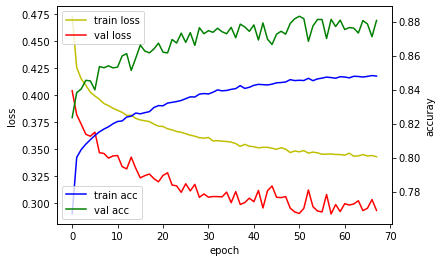

In [44]:
# 출처 https://tykimos.github.io/2017/07/09/Early_Stopping/

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [31]:
# epoch 1000, batch_size = 230 validation_split = 0.2 dropout = 0.1 , early stoppiong
train2_X = df_train_X.to_numpy()
model2 = Sequential()
model2.add(Dense(31))
model2.add(Dense(10))
model2.add(Dense(2, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=r'model/best_model2.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history2 = model2.fit(train2_X, train_y, epochs=1000, batch_size=230,
          validation_split= 0.2, callbacks=callbacks)

(323730, 240)
Epoch 1/1000
1127/1127 [==============================] - 4s 3ms/step - loss: 0.4583 - accuracy: 0.7972 - val_loss: 0.4282 - val_accuracy: 0.8164
Epoch 2/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4231 - accuracy: 0.8216 - val_loss: 0.4226 - val_accuracy: 0.8238
Epoch 3/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4209 - accuracy: 0.8237 - val_loss: 0.4194 - val_accuracy: 0.8241
Epoch 4/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4198 - accuracy: 0.8247 - val_loss: 0.4185 - val_accuracy: 0.8269
Epoch 5/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4192 - accuracy: 0.8251 - val_loss: 0.4194 - val_accuracy: 0.8264
Epoch 6/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4187 - accuracy: 0.8258 - val_loss: 0.4193 - val_accuracy: 0.8252
Epoch 7/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4184 - accuracy: 0.8262 - val_

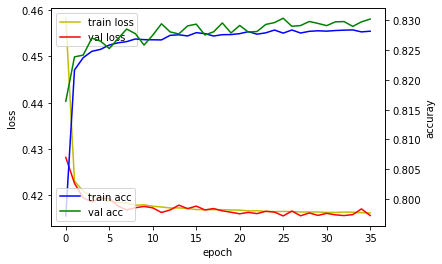

In [32]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [33]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 31)                7471      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                320       
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 22        
Total params: 7,813
Trainable params: 7,813
Non-trainable params: 0
_________________________________________________________________


In [46]:
# epoch 1000, batch_size = 230 validation_split = 0.2 dropout = 0.1 
model3 = Sequential()
model3.add(LSTM(25,input_shape=(240,1) ,dropout=0.1))
model3.add(Dense(2, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=r'model/best_model3.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]
history3 = model.fit(train_X, train_y, epochs=1000, batch_size=230,
          validation_split= 0.2, callbacks=callbacks)

Epoch 1/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.3415 - accuracy: 0.8490 - val_loss: 0.2880 - val_accuracy: 0.8832
Epoch 2/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.3420 - accuracy: 0.8489 - val_loss: 0.2931 - val_accuracy: 0.8801
Epoch 3/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.3425 - accuracy: 0.8485 - val_loss: 0.2903 - val_accuracy: 0.8830
Epoch 4/1000
1127/1127 [==============================] - 16s 14ms/step - loss: 0.3425 - accuracy: 0.8489 - val_loss: 0.2863 - val_accuracy: 0.8850
Epoch 5/1000
1127/1127 [==============================] - 15s 13ms/step - loss: 0.3413 - accuracy: 0.8496 - val_loss: 0.2928 - val_accuracy: 0.8777
Epoch 6/1000
1127/1127 [==============================] - 16s 14ms/step - loss: 0.3418 - accuracy: 0.8485 - val_loss: 0.2902 - val_accuracy: 0.8805
Epoch 7/1000
1127/1127 [==============================] - 15s 13ms/step - loss: 0.3415 - accuracy: 0.8485 - val_

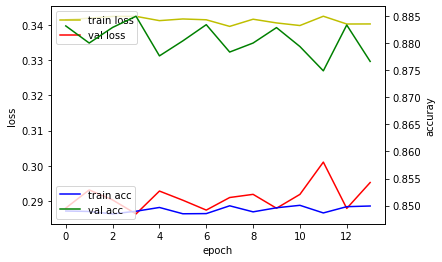

In [47]:
# 출처 https://tykimos.github.io/2017/07/09/Early_Stopping/

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [48]:
model3.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 25)                2700      
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 52        
Total params: 2,752
Trainable params: 2,752
Non-trainable params: 0
_________________________________________________________________
